<a href="https://colab.research.google.com/github/MdShahadatHossainbd/ML-PROJECT/blob/main/ML_project_0000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/archive/drugsComTrain_raw.csv') #train data
test = pd.read_csv('/content/gdrive/MyDrive/archive/drugsComTest_raw.csv') #test data

In [ ]:
#check the head of train data
train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [ ]:
#check the head of test data
test.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


In [ ]:
#check the shape of the given dataset
print(f'train has {train.shape[0]} number of rows and {train.shape[1]} number of columns')
print(f'train has {test.shape[0]} number of rows and {test.shape[1]} number of columns')

train has 161297 number of rows and 7 number of columns
train has 53766 number of rows and 7 number of columns


In [ ]:
#check the columns in train
train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [ ]:
#merge train and test data

merge = [train,test]
merged_data = pd.concat(merge,ignore_index=True)

merged_data.shape   #check the shape of merged_data

(215063, 7)

In [ ]:
#check uniqueID
merged_data['uniqueID'].nunique()

215063

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.5+ MB


<function matplotlib.pyplot.show>

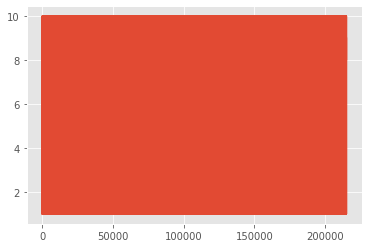

In [ ]:
plt.plot(merged_data.rating)
plt.show

In [ ]:
merged_data.rating

0          9
1          8
2          5
3          8
4          9
          ..
215058    10
215059     9
215060     8
215061     1
215062     9
Name: rating, Length: 215063, dtype: int64

In [ ]:
merged_data.describe(include='all')

,uniqueID,drugName,condition,review,rating,date,usefulCount
count,215063.000000,215063,213869,215063,215063.000000,215063,215063.000000
unique,NaN,3671,916,128478,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,1-Mar-16,NaN
freq,NaN,4930,38436,39,NaN,185,NaN
mean,116039.364814,NaN,NaN,NaN,6.990008,NaN,28.001004
std,67007.913366,NaN,NaN,NaN,3.275554,NaN,36.346069
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58115.500000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115867.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173963.500000,NaN,NaN,NaN,10.000000,NaN,36.000000


In [ ]:
merged_data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [ ]:
merged_data.isnull().sum()/merged_data.shape[0]

uniqueID       0.000000
drugName       0.000000
condition      0.005552
review         0.000000
rating         0.000000
date           0.000000
usefulCount    0.000000
dtype: float64

In [ ]:
#lets check the number of drugs/condition
merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20)

condition
Not Listed / Othe                             253
Pain                                          219
Birth Control                                 181
High Blood Pressure                           146
Acne                                          127
Depression                                    115
Rheumatoid Arthritis                          107
Diabetes, Type 2                               97
Allergic Rhinitis                              95
Insomnia                                       85
Osteoarthritis                                 84
Bipolar Disorde                                82
Anxiety                                        81
Abnormal Uterine Bleeding                      77
Endometriosis                                  64
3</span> users found this comment helpful.     62
Psoriasis                                      61
Migraine                                       60
ADHD                                           58
4</span> users found this comment helpfu

In [ ]:
span_data = merged_data[merged_data['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/merged_data.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_))

Number of rows with </span> values :  1171
Total percent of noisy data 0.5444916140851751 %  


In [ ]:
#drop the nosie 
merged_data.drop(span_data.index, axis = 0, inplace=True)

In [ ]:
#Data Pre-Processing
# check the null values
merged_data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [ ]:
# drop the null values
merged_data.dropna(inplace=True, axis=0)

In [ ]:
#check first three reviews
for i in merged_data['review'][0:3]:
    print(i,'\n')

"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil" 

"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective." 

"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestod

In [ ]:
#import the libraries for pre-processing
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stops = set(stopwords.words('english')) #english stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#apply review_to_words function on reviews
merged_data['review'] = merged_data['review'].apply(review_to_words)

In [ ]:
#create sentiment feature from ratings
#if rating > 5 sentiment = 1 (positive)
#if rating < 5 sentiment = 0 (negative)
merged_data['sentiment'] = merged_data["rating"].apply(lambda x: 1 if x > 5 else 0)

In [ ]:
#Building Model
#import all the necessary packages

from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

In [ ]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(merged_data.review)
reviews_corpus.shape

(212698, 34709)

In [ ]:
#dependent feature
sentiment = merged_data['sentiment']
sentiment.shape

(212698,)

In [ ]:
#split the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.33,random_state=42)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (142507, 34709) (142507,)
Test data shape  (70191, 34709) (70191,)


In [ ]:
#Multinomial Naive Bayes
#fit the model and predicct the output

clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf.predict(X_test) #predict the sentiment for test data

print("Accuracy: %s" % str(clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix") 
print(confusion_matrix(pred, Y_test)) #print confusion matrix

Accuracy: 0.7589719479705376
Confusion Matrix
[[ 4506   646]
 [16272 48767]]


In [40]:
#RandomForestClassifier
#fit the model and predicct the output

clf = RandomForestClassifier().fit(X_train, Y_train)

pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.8958128534997364
Confusion Matrix
[[14001   536]
 [ 6777 48877]]


In [42]:
Y_pred = clf.predict(X_test)

In [43]:
from sklearn import metrics
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79     20778
           1       0.88      0.99      0.93     49413

    accuracy                           0.90     70191
   macro avg       0.92      0.83      0.86     70191
weighted avg       0.90      0.90      0.89     70191



[[14001  6777]
 [  536 48877]]


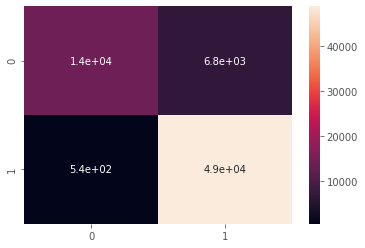

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot= True)
print(cm)

In [45]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.8958128534997364
